In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

In [3]:
import os
import types
import pandas as pd
os.chdir("C:/Users/user/Desktop/Introduction to Data Analytics in Business/Group assignment")
data = pd.read_csv('CreditCardDefault.csv')
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [6]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [7]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [8]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [9]:
data.drop(['ID'],axis=1,inplace=True)

In [10]:
data.rename(columns={'PAY_0':'PAY_1','default_payment_next_month':'next_month'},inplace=True)

In [11]:
df=(data.EDUCATION==0) |(data.EDUCATION==5)|(data.EDUCATION==6)# EDUCATION 0,5,6 into Other

In [12]:
data.loc[df,'EDUCATION']=4#Education is now in 'other' category because we do not have information about 0,5,6

In [13]:
df2=(data['MARRIAGE']==0)#No information about marriage 0 so also putting it into 'other'

In [14]:
data.loc[df2,'MARRIAGE']=3 # this is other

In [15]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


0    23364
1     6636
Name: next_month, dtype: int64
0    0.7788
1    0.2212
Name: next_month, dtype: float64


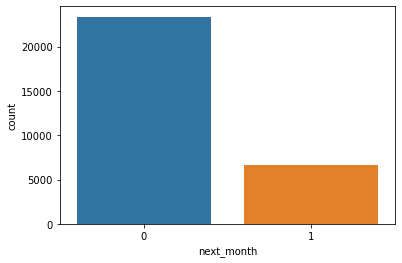

In [16]:
sns.countplot(x=data['next_month'])
print(data.next_month.value_counts())
print(data.next_month.value_counts(normalize=True))

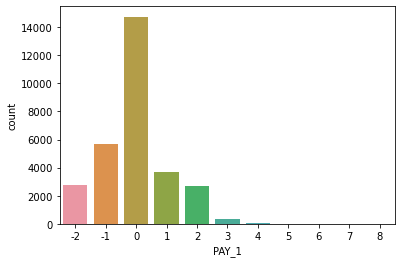

In [17]:
sns.countplot(x=data['PAY_1'])

In [18]:
def coplo(z):
    a=sns.countplot(x=data[z])
    return a #Definig a function to plot count plot

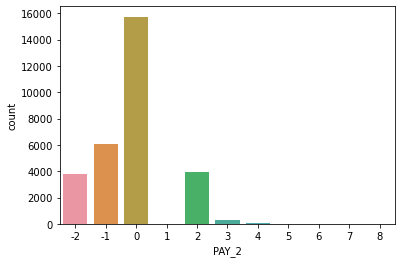

In [19]:
coplo('PAY_2')

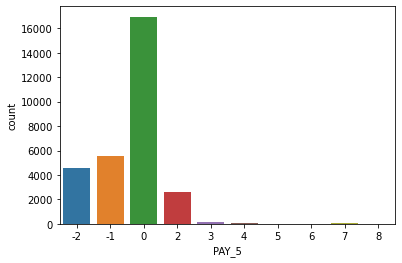

In [20]:
coplo('PAY_5')

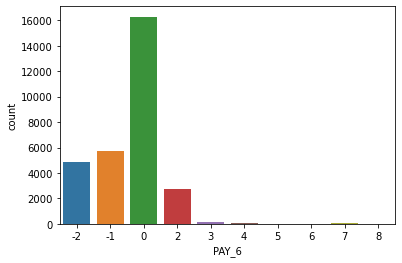

In [21]:
coplo('PAY_6')

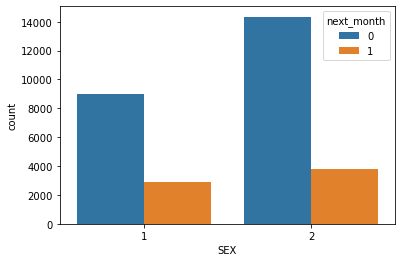

In [22]:
sns.countplot(x ='SEX', hue = "next_month", data = data) 

In [23]:
def corr(a,b):
    x=data.groupby([a,b]).size().unstack()
    x['perc'] = (x[x.columns[1]]/(x[x.columns[0]] + x[x.columns[1]]))
    return x

In [24]:
corr('EDUCATION','next_month')#less educated ,more defaulter

next_month,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


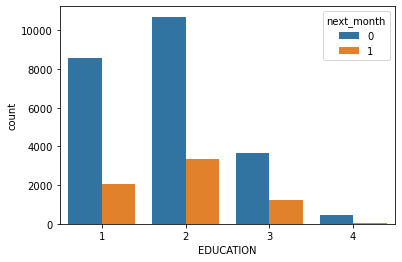

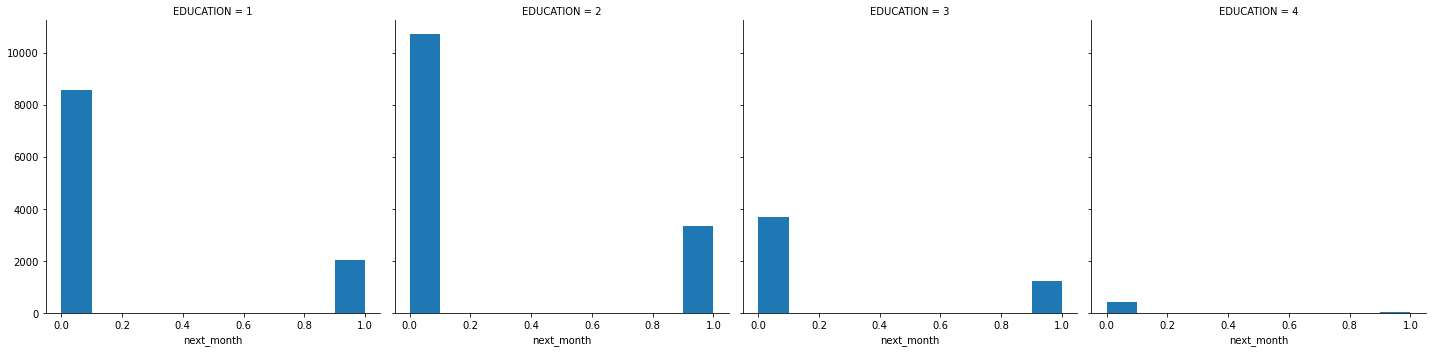

In [25]:
corr('EDUCATION','next_month')#less educated ,more defaulter
sns.countplot(x ='EDUCATION', hue = "next_month", data = data) 
g=sns.FacetGrid(data,col='EDUCATION',height=5)
g.map(plt.hist,'next_month')

In [26]:
corr('MARRIAGE','next_month')# Singles are DEFAULTER

next_month,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


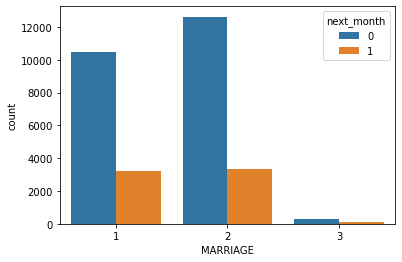

In [27]:
sns.countplot(x ='MARRIAGE', hue = "next_month", data = data)#less educated ,more defaulter

In [28]:
corr('EDUCATION','SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


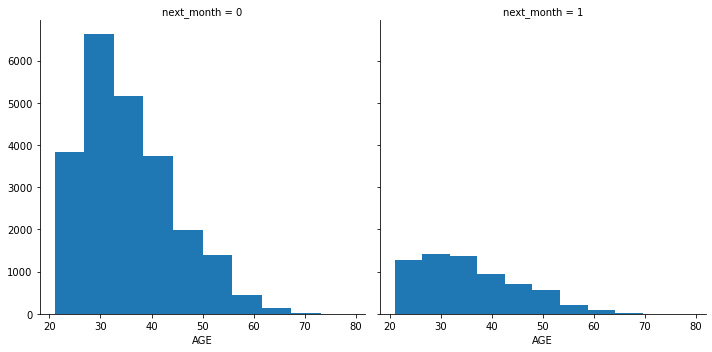

In [29]:
g = sns.FacetGrid(data, col = 'next_month',height=5)
g.map(plt.hist,'AGE')#25-30 more likely to default

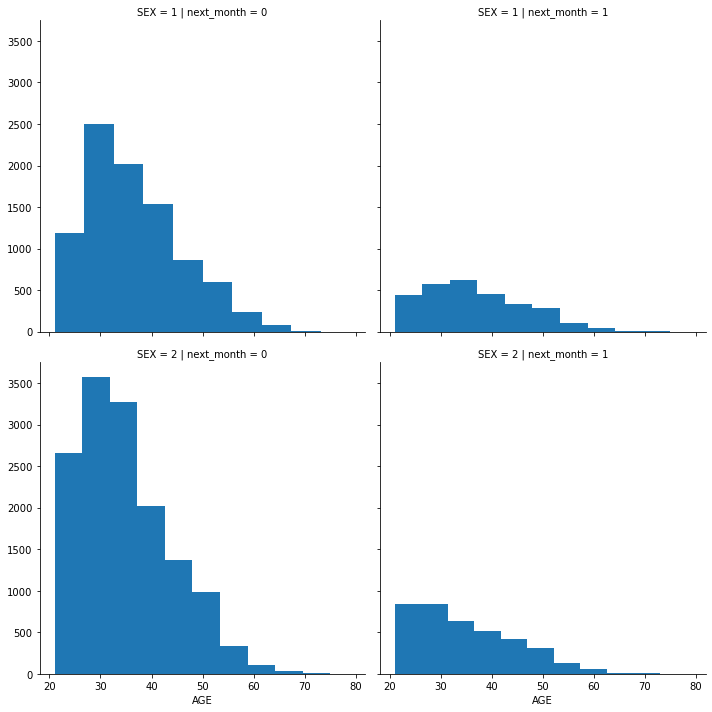

In [30]:
g=sns.FacetGrid(data, col='next_month',row='SEX',height=5)
g.map(plt.hist,'AGE')  #male in 25 to 35 more defaulter, female in 20 to 30.

In [31]:
data[['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] = data[['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].astype('object')

#One Hot encoding
data = pd.get_dummies(data)
data.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [32]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'next_month', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-2', 'PAY_1_-1',
       'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5',
       'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_

In [33]:
OneHot=data[['SEX_1','SEX_2','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_1','MARRIAGE_2','MARRIAGE_3','PAY_1_-2','PAY_1_-1','PAY_1_0','PAY_1_1','PAY_1_2','PAY_1_3','PAY_1_4','PAY_1_5','PAY_1_6','PAY_1_7','PAY_1_8','PAY_2_-2','PAY_2_-1','PAY_2_0','PAY_2_1','PAY_2_2','PAY_2_3','PAY_2_4', 'PAY_2_5','PAY_2_6','PAY_2_7','PAY_2_8','PAY_3_-2','PAY_3_-1','PAY_3_0','PAY_3_1','PAY_3_2','PAY_3_3','PAY_3_4','PAY_3_5','PAY_3_6','PAY_3_7','PAY_3_8','PAY_4_-2','PAY_4_-1','PAY_4_0','PAY_4_1','PAY_4_2','PAY_4_3','PAY_4_4','PAY_4_5','PAY_4_6','PAY_4_7','PAY_4_8','PAY_5_-2','PAY_5_-1','PAY_5_0','PAY_5_2','PAY_5_3','PAY_5_4','PAY_5_5','PAY_5_6','PAY_5_7','PAY_5_8','PAY_6_-2','PAY_6_-1','PAY_6_0','PAY_6_2','PAY_6_3','PAY_6_4','PAY_6_5','PAY_6_6','PAY_6_7','PAY_6_8']]

In [34]:
OneHot

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
29998,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
Num_data=data[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

In [36]:
Num_data

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


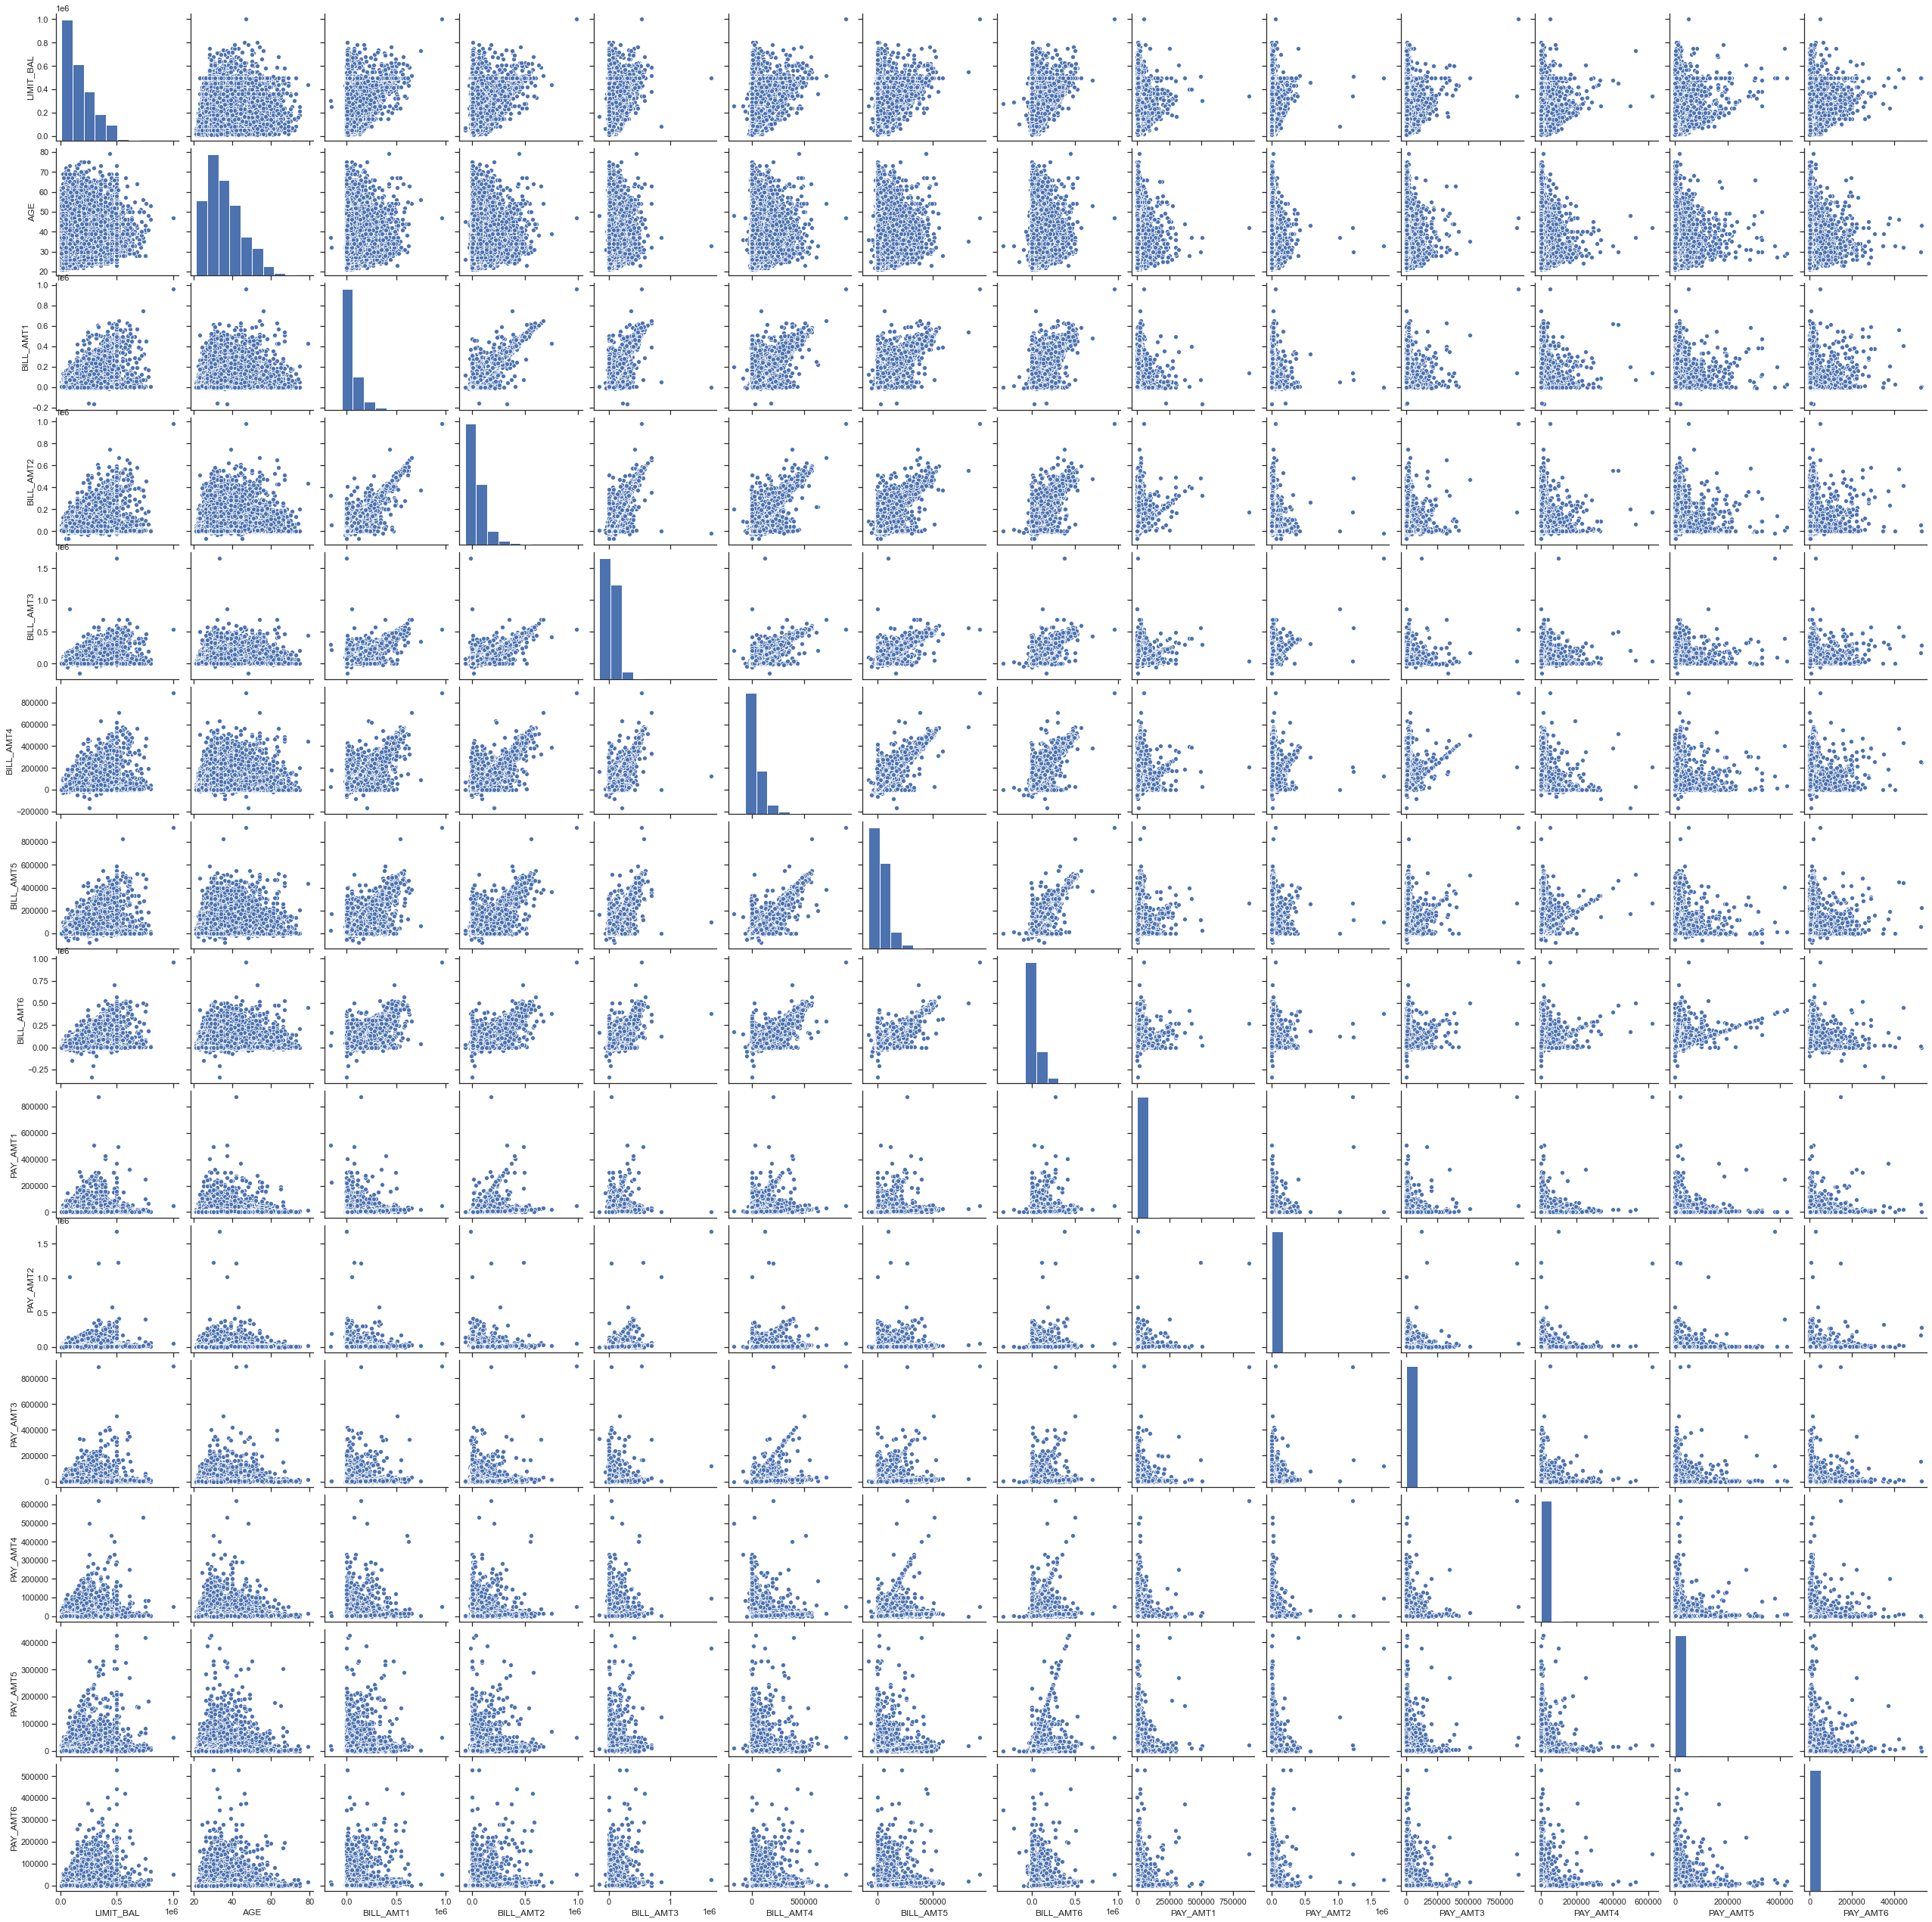

In [37]:
# producing scatterplots of the numerical variables
sns.set(style="ticks") 
sns.pairplot(Num_data.iloc[:,0:14])

In [38]:
Nmrldata= (Num_data-Num_data.min())/(Num_data.max()-Num_data.min())

In [39]:
Nmrldata

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [40]:
Input = Nmrldata.join(OneHot)

In [41]:
Input #this is without SEX_MAR, SEX_EDU,AGE_BIN

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,1,0,0,0,0,0,0,0,0,0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0,0,0,1,0,0,0,0,0,0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0,0,1,0,0,0,0,0,0,0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0,0,1,0,0,0,0,0,0,0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0,0,1,0,0,0,0,0,0,0
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0,0,1,0,0,0,0,0,0,0
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,0,1,0,0,0,0,0,0,0,0


In [42]:
Y = data['next_month']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Input, Y,
test_size=0.30, random_state=0)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (21000, 87) (21000,)
Test set: (9000, 87) (9000,)


In [44]:
Data_train = X_train.join(Y_train)

In [45]:
Data_majority = Data_train[Data_train.next_month == 0]
Data_minority = Data_train[Data_train.next_month == 1]

In [46]:
##Logistic Regression
parameters = {
    'penalty' : ['l1', 'l2'],
    "C" : [0.1, 0.4, 0.8, 1, 2, 5,10]
    
}

grid_search_logreg = GridSearchCV(LogisticRegression(solver="liblinear"), parameters, cv=5, return_train_score=True)

In [47]:
grid_search_logreg.fit(X_train, Y_train)
grid_search_logreg.best_params_

{'C': 10, 'penalty': 'l1'}

In [48]:
###Logistic Regression with unbalanced weights 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR= LogisticRegression(penalty='l1', solver='liblinear', C=0.8)
LR.fit(X_train,Y_train)

LogisticRegression(C=0.8, penalty='l1', solver='liblinear')

In [49]:
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(LR, X_train, Y_train,
scoring='accuracy', cv = 10)


In [50]:
mean_accuracy_trainLRUB = accuracy_train.mean()
std_accuracy_trainLRUB = accuracy_train.std()
print(mean_accuracy_trainLRUB, std_accuracy_trainLRUB)

0.8194285714285714 0.005237229365663808


In [51]:
#CONFUSION MATRIX FOR Logistic Regression UNBALANCED on the TRAIN SET
Y_train_pred = LR.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
Cm_train

array([[15530,   774],
       [ 3002,  1694]], dtype=int64)

In [52]:
Y_test_pred = LR.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
from sklearn.metrics import accuracy_score, recall_score
accuracy_testLRUB = accuracy_score(Y_test,Y_test_pred)
Cm_test

array([[6742,  318],
       [1262,  678]], dtype=int64)

In [53]:
#Report on Accuracy
report_accuracy = pd.DataFrame(columns=['Model','Mean accuracy.Training', 'Standard Deviation','accuracy.Test'])
report_accuracy.loc[len(report_accuracy)]=['Logistic Regression Unbalanced',mean_accuracy_trainLRUB,std_accuracy_trainLRUB,accuracy_testLRUB]
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444


In [54]:
#Calculating recall score FOR Logistic Regression UNBALANCED on the TRAIN SET
from sklearn.model_selection import cross_val_score
recall_train = cross_val_score(LR, X_train, Y_train,
scoring='recall', cv = 10)


In [55]:
mean_recall_trainLRUB = recall_train.mean()
std_recall_trainLRUB = recall_train.std()
print(mean_recall_trainLRUB, std_recall_trainLRUB)

0.35776119402985074 0.021371383942615084


In [56]:
Y_train_pred = LR.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)

In [57]:
Y_test_pred = LR.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_testLRUB = recall_score(Y_test,Y_test_pred)
recall_testLRUB

0.3494845360824742

In [58]:
#Report on recall
report_recall = pd.DataFrame(columns=['Model','Mean recall.Training', 'Standard Deviation','recall.Test'])
report_recall.loc[len(report_recall)]=['Logistic Regression Unbalanced',mean_recall_trainLRUB,std_recall_trainLRUB,recall_testLRUB]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485


In [59]:
#ROC_AUC FOR Logistic Regression UNBALANCED on the TRAIN SET
Y_probstr = LR.predict_proba(X_train)
print(Y_probstr[0:6,:])
Y_train_probs = np.array(np.where(Y_train==1, 1, 0))
print(Y_train_probs[0:6])

[[0.81072291 0.18927709]
 [0.62348487 0.37651513]
 [0.97448073 0.02551927]
 [0.87897058 0.12102942]
 [0.66386013 0.33613987]
 [0.91855689 0.08144311]]
[0 0 0 0 1 0]


In [60]:
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probs, Y_probstr[:,1])
print(fpr, tpr, threshold)

[0.         0.         0.         ... 0.99877331 0.99877331 1.        ] [0.00000000e+00 2.12947189e-04 1.06473595e-03 ... 9.99787053e-01
 1.00000000e+00 1.00000000e+00] [1.92188227e+00 9.21882270e-01 9.10866875e-01 ... 1.46056309e-02
 1.44959843e-02 1.68386315e-06]


In [61]:
from sklearn.metrics import auc
ROC_AUC_train_LR_UB = auc(fpr, tpr)
print(ROC_AUC_train_LR_UB)

0.7691778835745202


In [62]:
#ROC_AUC FOR Logistic Regression UNBALANCED on the TEST SET
Y_probste = LR.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_LR_UB = auc(fpr, tpr)
print(ROC_AUC_test_LR_UB)

0.7685677988376508


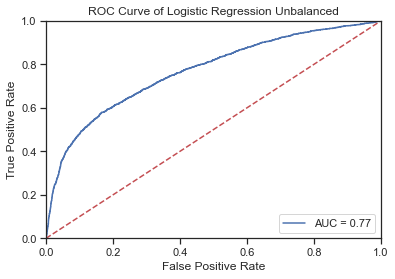

In [63]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_LR_UB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Unbalanced')
plt.show()

In [64]:
#Report on ROC_AUC
report_ROC_AUC = pd.DataFrame(columns=['Model','ROC_AUC.Training','ROC_AUC.Test'])
report_ROC_AUC.loc[len(report_ROC_AUC)]=['Logistic Regression Unbalanced',ROC_AUC_train_LR_UB,ROC_AUC_test_LR_UB]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568


In [65]:
#BALANCED (Class weights)+CROSSVAL LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_B = LogisticRegression(penalty='l1', solver='liblinear', C=0.8, class_weight='balanced')
LR_B.fit(X_train,Y_train)

LogisticRegression(C=0.8, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [66]:
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(LR_B, X_train, Y_train,
scoring='accuracy', cv = 10)
Y_train_pred = LR_B.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)


In [67]:
mean_accuracy_trainLRB = accuracy_train.mean()
std_accuracy_trainLRB = accuracy_train.std()
print(mean_accuracy_trainLRB, std_accuracy_trainLRB)

0.776142857142857 0.006786173752197278


In [68]:
Y_test_pred = LR_B.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
from sklearn.metrics import accuracy_score, recall_score
accuracy_testLRB = accuracy_score(Y_test,Y_test_pred)
print(accuracy_testLRB)

0.7794444444444445


In [69]:
report_accuracy.loc[len(report_accuracy)]=['Logistic Regression balanced',mean_accuracy_trainLRB,std_accuracy_trainLRB, accuracy_testLRB]
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444


In [70]:
from sklearn.model_selection import cross_val_score
recall_train = cross_val_score(LR_B, X_train, Y_train,
scoring='recall', cv = 10)
Y_train_pred = LR_B.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_recall_trainLRB = recall_train.mean()
std_recall_trainLRB = recall_train.std()
print(mean_recall_trainLRB, std_recall_trainLRB)

0.576669237399628 0.019112502708862483


In [71]:
Y_test_pred = LR_B.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_testLRB = recall_score(Y_test,Y_test_pred)
recall_testLRB

0.5742268041237113

In [72]:
report_recall.loc[len(report_recall)]=['Logistic Regression balanced',mean_recall_trainLRB,std_recall_trainLRB,recall_testLRB]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227


In [73]:
#ROC_AUC FOR Logistic Regression Balanced on the train set
Y_probstr = LR_B.predict_proba(X_train)
Y_train_probs = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probs, Y_probstr[:,1])

In [74]:
#ROC_AUC FOR Logistic Regression BALANCED on the TRAIN SET
Y_probstr = LR.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_train_LR_B = auc(fpr, tpr)
print(ROC_AUC_train_LR_B)

0.7685677988376508


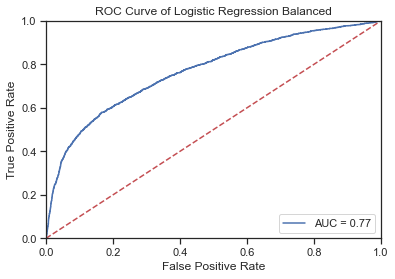

In [75]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_LR_B)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Balanced')
plt.show()

In [76]:
#ROC_AUC FOR Logistic Regression BALANCED on the TEST SET
Y_probste = LR_B.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_LR_B = auc(fpr, tpr)
print(ROC_AUC_test_LR_B)

0.7704043398265237


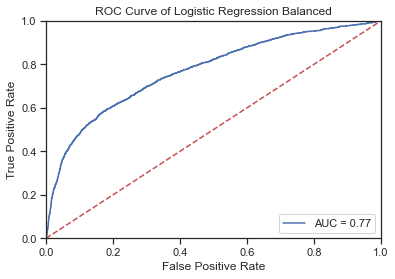

In [77]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_LR_B)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Balanced')
plt.show()

In [78]:
#Report on ROC_AUC
report_ROC_AUC.loc[len(report_ROC_AUC)]=['Logistic Regression Balanced',ROC_AUC_train_LR_B,ROC_AUC_test_LR_B]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404


In [79]:
#KNN CLASSIFIER
accuracies = []
for k in range(1,25):
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(X_train, Y_train)
    Y_test_pred = knnmodel.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_pred)
     
    print(k, accuracy)
    accuracies.append(accuracy)

1 0.7302222222222222
2 0.7923333333333333
3 0.7814444444444445
4 0.8003333333333333
5 0.7961111111111111
6 0.8065555555555556
7 0.8054444444444444
8 0.8101111111111111
9 0.8085555555555556
10 0.8133333333333334
11 0.8128888888888889
12 0.8147777777777778
13 0.8147777777777778
14 0.8128888888888889
15 0.8144444444444444
16 0.8153333333333334
17 0.8155555555555556
18 0.8154444444444444
19 0.816
20 0.8155555555555556
21 0.8172222222222222
22 0.8165555555555556
23 0.8173333333333334
24 0.8163333333333334


In [80]:
opt_k = np.argmax(accuracies) + 1
print('Optimal_k =', opt_k)

Optimal_k = 23


In [81]:
accuracy_train = cross_val_score(knnmodel, X_train, Y_train,
scoring='accuracy', cv = 10)
knnmodel=KNeighborsClassifier(n_neighbors=23)
knnmodel.fit(X_train,Y_train)
Y_train_pred=knnmodel.predict(X_train)
Y_test_pred = knnmodel.predict(X_test)

In [82]:
mean_accuracy_trainKNN = accuracy_train.mean()
std_accuracy_trainKNN = accuracy_train.std()
print(mean_accuracy_trainKNN, std_accuracy_trainKNN)

0.8147142857142857 0.0051351352964134934


In [83]:
Cm_train = confusion_matrix(Y_train, Y_train_pred)
Cm_train

array([[15601,   703],
       [ 3002,  1694]], dtype=int64)

In [84]:
Cm_test = confusion_matrix(Y_test, Y_test_pred)
Cm_test

array([[6722,  338],
       [1306,  634]], dtype=int64)

In [85]:
accuracy_testKNN = accuracy_score(Y_test,Y_test_pred)
print(accuracy_testKNN)

0.8173333333333334


In [86]:
report_accuracy.loc[len(report_accuracy)]=['K-nearest Neighbour(k=23)',mean_accuracy_trainKNN,std_accuracy_trainKNN, accuracy_testKNN]
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444
2,K-nearest Neighbour(k=23),0.814714,0.005135,0.817333


In [87]:

recall_train = cross_val_score(knnmodel, X_train, Y_train,
scoring='recall', cv = 10)
mean_recall_trainKNN = recall_train.mean()
std_recall_trainKNN = recall_train.std()
print(mean_recall_trainKNN, std_recall_trainKNN)

0.3419938302408928 0.023072604096528605


In [88]:
recall_testKNN = recall_score(Y_test,Y_test_pred)
recall_testKNN

0.3268041237113402

In [89]:
report_recall.loc[len(report_recall)]=['K-nearest Neighbour(k=23)',mean_recall_trainKNN,std_recall_trainKNN,recall_testKNN]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227
2,K-nearest Neighbour(k=23),0.341994,0.023073,0.326804


In [90]:
#ROC_AUC FOR k-nearest neighbourhood on train set
Y_probstr = knnmodel.predict_proba(X_train)
Y_train_probs = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probs, Y_probstr[:,1])

In [91]:
#ROC_AUC k-nearest neighbourhood on the TRAIN SET
Y_probstr = knnmodel.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_train_knn = auc(fpr, tpr)
print(ROC_AUC_train_knn)

0.7704043398265237


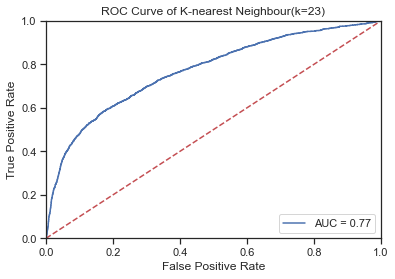

In [92]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of K-nearest Neighbour(k=23)')
plt.show()

In [93]:
#ROC_AUC FOR K-nearest Neighbour(k=23) on the TEST SET
Y_probste = knnmodel.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_knn = auc(fpr, tpr)
print(ROC_AUC_test_knn)

0.7430105721211412


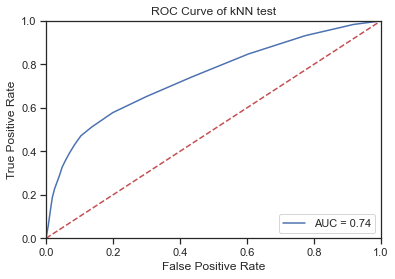

In [94]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN test')
plt.show()

In [95]:
#Report on ROC_AUC
report_ROC_AUC.loc[len(report_ROC_AUC)]=['K-nearest Neighbour(k=23)',ROC_AUC_train_knn,ROC_AUC_test_knn]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404
2,K-nearest Neighbour(k=23),0.770404,0.743011


In [96]:
#RANDOM FOREST UNBALANCED + CROSS VALIDATION
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
 'max_depth': [4.,6., 8.], 
 'n_estimators': [100, 150, 200] 
 }
CV_rfmodel = GridSearchCV(estimator=rfmodel, param_grid=param_grid, 
 cv=10)
CV_rfmodel.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4.0, 6.0, 8.0],
                         'n_estimators': [100, 150, 200]})

In [97]:
print(CV_rfmodel.best_params_)

{'max_depth': 8.0, 'n_estimators': 150}


In [98]:
rfmodel_best = rfmodel.set_params(**CV_rfmodel.best_params_)
rfmodel_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8.0, n_estimators=150, random_state=0)

In [100]:
accuracy_train = cross_val_score(rfmodel_best, X_train, Y_train,
scoring='accuracy', cv = 10)
rfmodel_best.fit(X_train, Y_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_accuracy_trainRFUB = accuracy_train.mean()
std_accuracy_trainRFUB = accuracy_train.std()
print(mean_accuracy_trainRFUB, std_accuracy_trainRFUB)

0.816857142857143 0.006738389695736671


In [101]:
Y_test_pred = rfmodel_best.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
from sklearn.metrics import accuracy_score, recall_score
accuracy_testRFUB = accuracy_score(Y_test,Y_test_pred)

In [102]:
report_accuracy.loc[len(report_accuracy)]=['Random forest Unbalanced',mean_accuracy_trainRFUB,std_accuracy_trainRFUB,accuracy_testRFUB]
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444
2,K-nearest Neighbour(k=23),0.814714,0.005135,0.817333
3,Random forest Unbalanced,0.816857,0.006738,0.819778


In [103]:
recall_train = cross_val_score(rfmodel_best, X_train, Y_train,
scoring='recall', cv = 10)
Y_train_pred = rfmodel_best.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_recall_trainRFUB = recall_train.mean()
std_recall_trainRFUB = recall_train.std()
print(mean_recall_trainRFUB, std_recall_trainRFUB)

0.3296534047089779 0.023515683089225924


In [104]:
Y_test_pred = rfmodel_best.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_testRFUB = recall_score(Y_test,Y_test_pred)
recall_testRFUB

0.31288659793814433

In [105]:
report_recall.loc[len(report_recall)]=['Random forest imbalanced',mean_recall_trainRFUB,std_recall_trainRFUB,recall_testRFUB]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227
2,K-nearest Neighbour(k=23),0.341994,0.023073,0.326804
3,Random forest imbalanced,0.329653,0.023516,0.312887


In [106]:
#ROC_AUC FOR RANDOM FOREST UNBALANCED WITH CROSS VALIDATION
Y_probstr=rfmodel_best.predict_proba(X_train)
Y_train_probstr = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probstr, Y_probstr[:,1])
from sklearn.metrics import auc
ROC_AUC_train_RFUB = auc(fpr,tpr)
print(ROC_AUC_train_RFUB)

0.8143150796075587


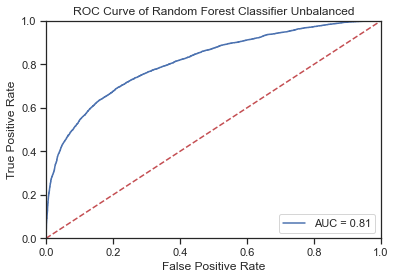

In [107]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_RFUB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier Unbalanced')
plt.show()

In [108]:
#ROC_AUC FOR RANDOM FOREST UNBALANCED FOR TEST SET
Y_probste = rfmodel_best.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_RFUB = auc(fpr, tpr)
print(ROC_AUC_test_RFUB)

0.7820954046318741


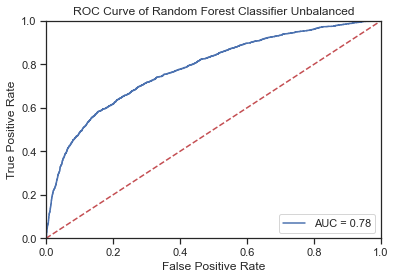

In [109]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_RFUB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier Unbalanced')
plt.show()

In [110]:
report_ROC_AUC.loc[len(report_ROC_AUC)]=['Random Forest Unbalanced',ROC_AUC_train_RFUB,ROC_AUC_test_RFUB]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404
2,K-nearest Neighbour(k=23),0.770404,0.743011
3,Random Forest Unbalanced,0.814315,0.782095


In [111]:
#RANDOM FOREST BALANCED + CROSS VALIDATION
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,class_weight='balanced')
from sklearn.model_selection import GridSearchCV
param_grid = { 
 'max_depth': [6., 7., 8.], 
 'n_estimators': [10, 50, 100] 
 }
CV_rfmodel = GridSearchCV(estimator=rfmodel, param_grid=param_grid, 
 cv=10)
CV_rfmodel.fit(X_train, Y_train)
print(CV_rfmodel.best_params_)

{'max_depth': 8.0, 'n_estimators': 50}


In [112]:
rfmodel_best = rfmodel.set_params(**CV_rfmodel.best_params_)
rfmodel_best.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8.0, n_estimators=50,
                       random_state=0)

In [113]:
accuracy_train = cross_val_score(rfmodel_best, X_train, Y_train,
scoring='accuracy', cv = 10)
Y_train_pred = rfmodel_best.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_accuracy_trainRFB = accuracy_train.mean()
std_accuracy_trainRFB = accuracy_train.std()
print(mean_accuracy_trainRFB, std_accuracy_trainRFB)

0.7797142857142857 0.008308670989119889


In [114]:
Y_test_pred = rfmodel_best.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
accuracy_testRFB = accuracy_score(Y_test,Y_test_pred)

In [115]:
report_accuracy.loc[len(report_accuracy)]=['Random forest Balanced',mean_accuracy_trainRFB,std_accuracy_trainRFB,accuracy_testRFB]
report_accuracy


,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444
2,K-nearest Neighbour(k=23),0.814714,0.005135,0.817333
3,Random forest Unbalanced,0.816857,0.006738,0.819778
4,Random forest Balanced,0.779714,0.008309,0.781111


In [116]:
recall_train = cross_val_score(rfmodel_best, X_train, Y_train,
scoring='recall', cv = 10)
Y_train_pred = rfmodel_best.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_recall_trainRFB = recall_train.mean()
std_recall_trainRFB = recall_train.std()
print(mean_recall_trainRFB, std_recall_trainRFB)

0.5905044685387651 0.01998028944627365


In [117]:
Y_test_pred = rfmodel_best.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_testRFB = recall_score(Y_test,Y_test_pred)
recall_testRFB

0.5747422680412371

In [118]:
report_recall.loc[len(report_recall)]=['Random forest balanced',mean_recall_trainRFB,std_recall_trainRFB,recall_testRFB]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227
2,K-nearest Neighbour(k=23),0.341994,0.023073,0.326804
3,Random forest imbalanced,0.329653,0.023516,0.312887
4,Random forest balanced,0.590504,0.019980,0.574742


In [119]:
#ROC_AUC FOR RANDOM FOREST BALANCED WITH CROSS VALIDATION
Y_probstr=rfmodel_best.predict_proba(X_train)
Y_train_probstr = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probstr, Y_probstr[:,1])
from sklearn.metrics import auc
ROC_AUC_train_RFB = auc(fpr,tpr)
print(ROC_AUC_train_RFB)

0.8183353590134966


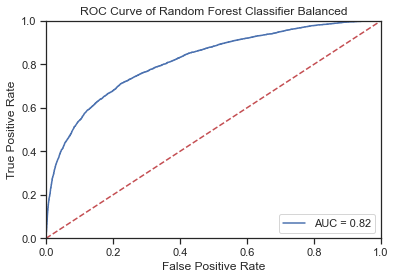

In [120]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_RFB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier Balanced')
plt.show()

In [121]:
#ROC_AUC FOR RANDOM FOREST BALANCED FOR TEST SET
Y_probste = rfmodel_best.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_RFB = auc(fpr, tpr)
print(ROC_AUC_test_RFB)

0.7800386962997576


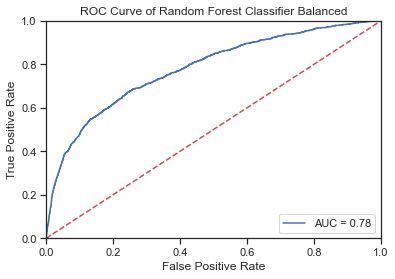

In [122]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_RFB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier Balanced')
plt.show()

In [123]:
report_ROC_AUC.loc[len(report_ROC_AUC)]=['Random Forest Balanced',ROC_AUC_train_RFB,ROC_AUC_test_RFB]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404
2,K-nearest Neighbour(k=23),0.770404,0.743011
3,Random Forest Unbalanced,0.814315,0.782095
4,Random Forest Balanced,0.818335,0.780039


In [124]:
##DECISION TREE BALANCED
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 4, 5, 7]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'max_depth': 4}

In [125]:
decision_tree_model = DecisionTreeClassifier(\
        max_depth = grid_search.best_params_['max_depth'],class_weight='balanced').fit(X_train, Y_train)


In [126]:
accuracy_train = cross_val_score(decision_tree_model, X_train, Y_train,
scoring='accuracy', cv = 5)
Y_train_pred = decision_tree_model.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_accuracy_trainDTB = accuracy_train.mean()
std_accuracy_trainDTB = accuracy_train.std()
print(mean_accuracy_trainDTB, std_accuracy_trainDTB)

0.7894285714285715 0.0037331632614323006


In [127]:
Y_test_pred = decision_tree_model.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
accuracy_testDTB = accuracy_score(Y_test,Y_test_pred)

In [128]:
report_accuracy.loc[len(report_accuracy)]=['Decision tree balanced',mean_accuracy_trainDTB,std_accuracy_trainDTB,accuracy_testDTB]
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444
2,K-nearest Neighbour(k=23),0.814714,0.005135,0.817333
3,Random forest Unbalanced,0.816857,0.006738,0.819778
4,Random forest Balanced,0.779714,0.008309,0.781111
5,Decision tree balanced,0.789429,0.003733,0.794000


In [129]:
recall_train = cross_val_score(decision_tree_model, X_train, Y_train,
scoring='recall', cv = 5)
Y_train_pred = decision_tree_model.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_recall_trainDTB = recall_train.mean()
std_recall_trainDTB = recall_train.std()
print(mean_recall_trainDTB, std_recall_trainDTB)

0.48977930346905935 0.013580726963995447


In [130]:
Y_test_pred = decision_tree_model.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_testDTB = recall_score(Y_test,Y_test_pred)
recall_testDTB

0.48711340206185566

In [131]:
report_recall.loc[len(report_recall)]=['Decision tree balanced',mean_recall_trainDTB,std_recall_trainDTB,recall_testDTB]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227
2,K-nearest Neighbour(k=23),0.341994,0.023073,0.326804
3,Random forest imbalanced,0.329653,0.023516,0.312887
4,Random forest balanced,0.590504,0.019980,0.574742
5,Decision tree balanced,0.489779,0.013581,0.487113


In [132]:
#ROC_AUC FOR DECISION TREE BALANCED WITH CROSS VALIDATION
Y_probstr=decision_tree_model.predict_proba(X_train)
Y_train_probstr = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probstr, Y_probstr[:,1])
from sklearn.metrics import auc
ROC_AUC_train_DTB = auc(fpr,tpr)
print(ROC_AUC_train_DTB)

0.7438036534444364


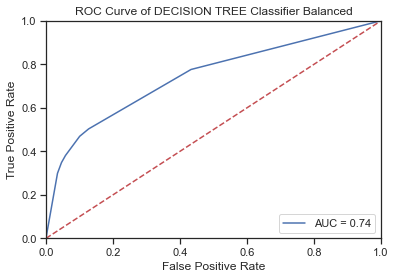

In [133]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_DTB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DECISION TREE Classifier Balanced')
plt.show()

In [134]:
#ROC_AUC FOR DECISION TREE BALANCED FOR TEST SET
Y_probste = decision_tree_model.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_DTB = auc(fpr, tpr)
print(ROC_AUC_test_DTB)

0.7392970050524225


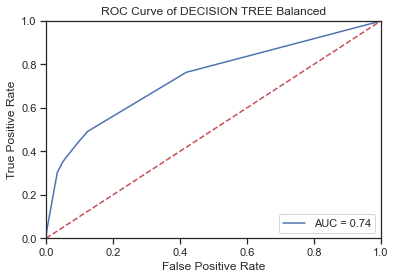

In [135]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_DTB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DECISION TREE Balanced')
plt.show()

In [136]:
report_ROC_AUC.loc[len(report_ROC_AUC)]=['DECISION TREE BALANCED',ROC_AUC_train_DTB,ROC_AUC_test_DTB]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404
2,K-nearest Neighbour(k=23),0.770404,0.743011
3,Random Forest Unbalanced,0.814315,0.782095
4,Random Forest Balanced,0.818335,0.780039
5,DECISION TREE BALANCED,0.743804,0.739297


In [137]:
##DECISION TREE UNBALANCED

In [138]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 4, 5, 7]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'max_depth': 4}

In [139]:
decision_tree_model = DecisionTreeClassifier(\
        max_depth = grid_search.best_params_['max_depth']).fit(X_train, Y_train)


In [140]:
accuracy_train = cross_val_score(decision_tree_model, X_train, Y_train,
scoring='accuracy', cv = 5)
Y_train_pred = decision_tree_model.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_accuracy_trainDTUB = accuracy_train.mean()
std_accuracy_trainDTUB= accuracy_train.std()
print(mean_accuracy_trainDTUB, std_accuracy_trainDTUB)

0.8176190476190477 0.0034305549817767378


In [141]:
Y_test_pred = decision_tree_model.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
accuracy_testDTUB = accuracy_score(Y_test,Y_test_pred)

In [142]:
report_accuracy.loc[len(report_accuracy)]=['Decision tree UNbalanced',mean_accuracy_trainDTUB,std_accuracy_trainDTUB,accuracy_testDTUB]
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444
2,K-nearest Neighbour(k=23),0.814714,0.005135,0.817333
3,Random forest Unbalanced,0.816857,0.006738,0.819778
4,Random forest Balanced,0.779714,0.008309,0.781111
5,Decision tree balanced,0.789429,0.003733,0.794000
6,Decision tree UNbalanced,0.817619,0.003431,0.823111


In [143]:
recall_train = cross_val_score(decision_tree_model, X_train, Y_train,
scoring='recall', cv = 5)
Y_train_pred = decision_tree_model.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_recall_trainDTUB = recall_train.mean()
std_recall_trainDTUB = recall_train.std()
print(mean_recall_trainDTUB, std_recall_trainDTUB)

0.35264065438560716 0.014216674402220277


In [144]:
Y_test_pred = decision_tree_model.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_testDTUB = recall_score(Y_test,Y_test_pred)
recall_testDTUB

0.3510309278350515

In [145]:
report_recall.loc[len(report_recall)]=['Decision tree UNbalanced',mean_recall_trainDTUB,std_recall_trainDTUB,recall_testDTUB]
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227
2,K-nearest Neighbour(k=23),0.341994,0.023073,0.326804
3,Random forest imbalanced,0.329653,0.023516,0.312887
4,Random forest balanced,0.590504,0.019980,0.574742
5,Decision tree balanced,0.489779,0.013581,0.487113
6,Decision tree UNbalanced,0.352641,0.014217,0.351031


In [146]:
#ROC_AUC FOR DECISION TREE UNBALANCED WITH CROSS VALIDATION
Y_probstr=decision_tree_model.predict_proba(X_train)
Y_train_probstr = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probstr, Y_probstr[:,1])
from sklearn.metrics import auc
ROC_AUC_train_DTUB = auc(fpr,tpr)
print(ROC_AUC_train_DTUB)

0.7433824936930851


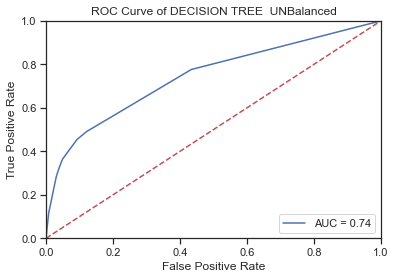

In [147]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_DTUB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DECISION TREE  UNBalanced')
plt.show()

In [148]:
Y_probste = decision_tree_model.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_DTUB = auc(fpr, tpr)
print(ROC_AUC_test_DTUB)

0.7407667708302912


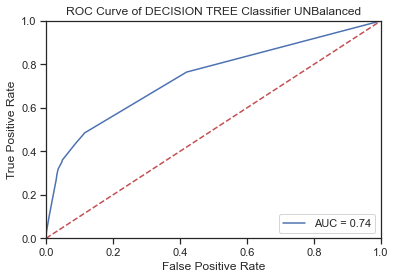

In [149]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_DTUB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DECISION TREE Classifier UNBalanced')
plt.show()

In [150]:
report_ROC_AUC.loc[len(report_ROC_AUC)]=['DECISION TREE UNBALANCED',ROC_AUC_train_DTUB,ROC_AUC_test_DTUB]
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404
2,K-nearest Neighbour(k=23),0.770404,0.743011
3,Random Forest Unbalanced,0.814315,0.782095
4,Random Forest Balanced,0.818335,0.780039
5,DECISION TREE BALANCED,0.743804,0.739297
6,DECISION TREE UNBALANCED,0.743382,0.740767


In [151]:
report_accuracy

,Model,Mean accuracy.Training,Standard Deviation,accuracy.Test
0,Logistic Regression Unbalanced,0.819429,0.005237,0.824444
1,Logistic Regression balanced,0.776143,0.006786,0.779444
2,K-nearest Neighbour(k=23),0.814714,0.005135,0.817333
3,Random forest Unbalanced,0.816857,0.006738,0.819778
4,Random forest Balanced,0.779714,0.008309,0.781111
5,Decision tree balanced,0.789429,0.003733,0.794000
6,Decision tree UNbalanced,0.817619,0.003431,0.823111


In [152]:
report_recall

,Model,Mean recall.Training,Standard Deviation,recall.Test
0,Logistic Regression Unbalanced,0.357761,0.021371,0.349485
1,Logistic Regression balanced,0.576669,0.019113,0.574227
2,K-nearest Neighbour(k=23),0.341994,0.023073,0.326804
3,Random forest imbalanced,0.329653,0.023516,0.312887
4,Random forest balanced,0.590504,0.019980,0.574742
5,Decision tree balanced,0.489779,0.013581,0.487113
6,Decision tree UNbalanced,0.352641,0.014217,0.351031


In [153]:
report_ROC_AUC

,Model,ROC_AUC.Training,ROC_AUC.Test
0,Logistic Regression Unbalanced,0.769178,0.768568
1,Logistic Regression Balanced,0.768568,0.770404
2,K-nearest Neighbour(k=23),0.770404,0.743011
3,Random Forest Unbalanced,0.814315,0.782095
4,Random Forest Balanced,0.818335,0.780039
5,DECISION TREE BALANCED,0.743804,0.739297
6,DECISION TREE UNBALANCED,0.743382,0.740767


In [154]:
##GRADIENT BOOST CLASSIFIER 
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
 'max_depth': [ 3., 4.], 
 'subsample': [0.8], 
 'n_estimators': [50, 100], 
 'learning_rate': [0.1, 0.2] 
}
CV_gbmodel = GridSearchCV(estimator=gbmodel, param_grid=param_grid, cv=5)
CV_gbmodel.fit(X_train, Y_train)
print(CV_gbmodel.best_params_)

{'learning_rate': 0.1, 'max_depth': 3.0, 'n_estimators': 50, 'subsample': 0.8}


In [155]:
gbmodel = gbmodel.set_params(**CV_gbmodel.best_params_)
gbmodel.fit(X_train, Y_train)
Y_test_pred = gbmodel.predict(X_test)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
report_accuracy.loc[len(report_accuracy)] = ['Gradient Boosting (grid)',
CV_gbmodel.cv_results_['mean_test_score'][CV_gbmodel.best_index_],
CV_gbmodel.cv_results_['std_test_score'][CV_gbmodel.best_index_],
accuracy_test]
print(report_accuracy.loc[len(report_accuracy)-1])

Model                     Gradient Boosting (grid)
Mean accuracy.Training                    0.819286
Standard Deviation                       0.0031515
accuracy.Test                             0.823111
Name: 7, dtype: object


In [156]:
accuracy_train = cross_val_score(CV_gbmodel, X_train, Y_train,
scoring='accuracy', cv = 5)
Y_train_pred = CV_gbmodel.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_accuracy_train = accuracy_train.mean()
std_accuracy_train = accuracy_train.std()
print(mean_accuracy_train, std_accuracy_train)

0.8182380952380953 0.002632433325920986


In [157]:
Y_test_pred = gbmodel.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
accuracy_testGB = accuracy_score(Y_test,Y_test_pred)
accuracy_testGB

0.8231111111111111

In [160]:
recall_train = cross_val_score(CV_gbmodel, X_train, Y_train,
scoring='recall', cv = 3)
Y_train_pred = CV_gbmodel.predict(X_train)
Cm_train = confusion_matrix(Y_train, Y_train_pred)
mean_recall_train_GB = recall_train.mean()
std_recall_train_GB = recall_train.std()
print(mean_recall_train_GB, std_recall_train_GB)

0.3581774312228574 0.01020993144705744


In [ ]:
Y_test_pred = CV_gbmodel.predict(X_test)
Cm_test = confusion_matrix(Y_test, Y_test_pred)
recall_test_GB = recall_score(Y_test,Y_test_pred)
recall_test_GB

In [ ]:
report_recall = pd.DataFrame(columns=['Model','Mean recall.Training', 'Standard Deviation','recall.Test'])
report_recall.loc[len(report_recall)]=['Gradient Boosting',mean_recall_train_GB,std_recall_train_GB,recall_test_GB]
report_recall

In [ ]:
#ROC_AUC FOR GRADIENT BOOSTING WITH CROSS VALIDATION
Y_probstr=CV_gbmodel.predict_proba(X_train)
Y_train_probstr = np.array(np.where(Y_train==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_train_probstr, Y_probstr[:,1])
from sklearn.metrics import auc
ROC_AUC_train_GB = auc(fpr,tpr)
print(ROC_AUC_train_GB)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_train_GB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Gradient Boosting_train')
plt.show()

In [ ]:
#ROC_AUC FOR GRADIENT BOOSTING FOR TEST SET
Y_probste = CV_gbmodel.predict_proba(X_test)
Y_test_probs = np.array(np.where(Y_test==1, 1, 0))
from sklearn.metrics import roc_curve 
fpr, tpr, threshold = roc_curve(Y_test_probs, Y_probste[:,1])
from sklearn.metrics import auc
ROC_AUC_test_GB = auc(fpr, tpr)
print(ROC_AUC_test_GB)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ROC_AUC_test_GB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Gradient Boost_test')
plt.show()

In [ ]:
report_ROC_AUC.loc[len(report_ROC_AUC)]=['Gradient Boost',ROC_AUC_train_GB,ROC_AUC_test_GB]
report_ROC_AUC